## Topic 4: Box Plots

Box plot (whisker plot) displays the five-number summary of a set of data:  
<li> **minimum**  
<li> **first quartile**: 25th percentile
<li> **median**  
<li> **third quartile** : 75th percentile
<li> **maximum**  

![Image of Diagram-of-boxplot-components-including-mean-median-1st-and-3rd-quartiles-outliers-and](https://www.researchgate.net/profile/Nabin_Basnet11/publication/321962400/figure/fig4/AS:573832927944704@1513823839218/Diagram-of-boxplot-components-including-mean-median-1st-and-3rd-quartiles-outliers-and.jpg)

In [73]:
sns.__version__

'0.8.1'

Percentiles are frequently used in comparisons in the real-world. For example, in my high school graduating class, my GPA ranked in the top 25th percentile.

### i.Libraries and Dependencies

In [72]:
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline  

### ii. Dataset and Plots

This dataset contains information of people's heart rates. Each row represents health/exercise metrics for a single person and tracks their heart rate as well as what kind of activity was done before the heart rate measurement.      

In [60]:
df_exercise = sns.load_dataset('exercise')
df_exercise.sample(6)

,Unnamed: 0,id,diet,pulse,time,kind
21,21,8,no fat,92,1 min,rest
42,42,15,low fat,89,1 min,walking
13,13,5,low fat,92,15 min,rest
25,25,9,no fat,99,15 min,rest
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running


In [61]:
#Reset the default parameters
sns.set()

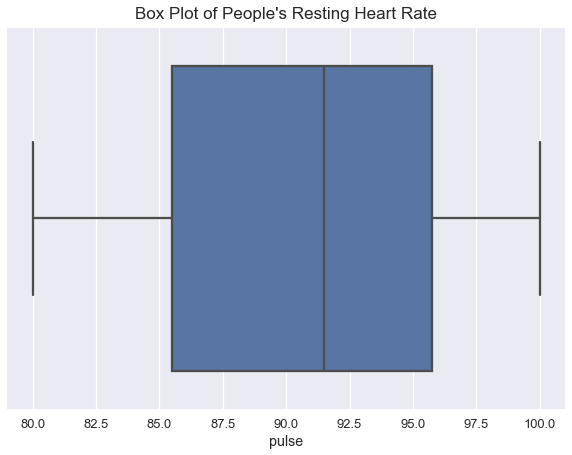

In [62]:
plt.figure(figsize=(10,7))
sns.set_context("talk")
ax = sns.boxplot(x=df_exercise[df_exercise['kind']=='rest']['pulse'])
ax.axes.set_title("Box Plot of People's Resting Heart Rate", fontsize=17, y=1.01); 

The median resting heart rate is roughly 92 beats per minute.  

The minimum recorded resting heart rate is 80 beats per minute and the maximum is 100 beats per minute.  

75% of people recorded a resting heart rate above 85.5 beats per minute. 25% of people recorded a resting heart rate   above 95.75 beats per minute.  

Also, in order to see exact numeric values of the quartiles in a box and whisker plot, you can also print out those values in a table format similar to the one below:  

In [63]:
df_exercise[df_exercise['kind']=='rest']['pulse'].describe()

count     30.000000
mean      90.833333
std        5.831445
min       80.000000
25%       85.500000
50%       91.500000
75%       95.750000
max      100.000000
Name: pulse, dtype: float64

#### Box Plot for Heart Rate Comparisons by Activity 

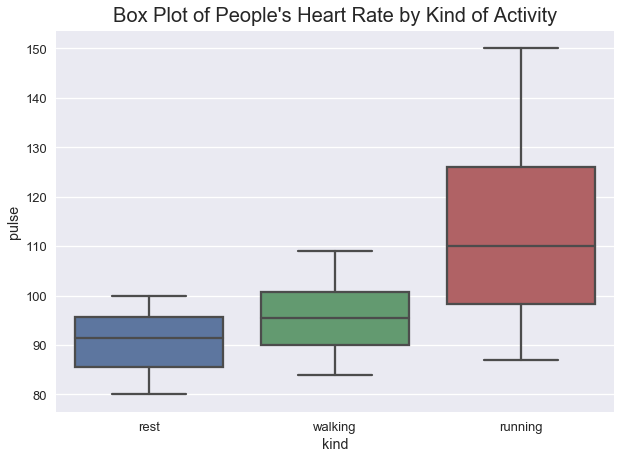

In [64]:
plt.figure(figsize=(10,7))
ax2 = sns.boxplot(x='kind', y='pulse', data=df_exercise, saturation=0.655)
ax2.axes.set_title("Box Plot of People's Heart Rate by Kind of Activity", fontsize=20, y=1.01);

As expected, the median heart increases by the level of exercise activity. There's a significant jump in the median heart rate for those running from walking since running is a strenous exercise activity.

The distribution of recorded heart rates for those running varies much more than the distribution for those recorded after rest or walking. The maximum recorded heart rate for running is 150 beats per minute.

### ii. Dataset and Plot : Distribution of Total Bills by Day of Week

In this public dataset, there's records from restaurant orders. Specifically, we'll look at orders by day of week and the total bill amounts in U.S. dollars.

In [65]:
df_tips =sns.load_dataset('tips')

Below, you can see a preview of 5 rows of the dataset. Note how each row represents meal order and there's fields for total bill amount and day of the week.

In [66]:
df_tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
205,16.47,3.23,Female,Yes,Thur,Lunch,3
91,22.49,3.50,Male,No,Fri,Dinner,2
47,32.40,6.00,Male,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
69,15.01,2.09,Male,Yes,Sat,Dinner,2


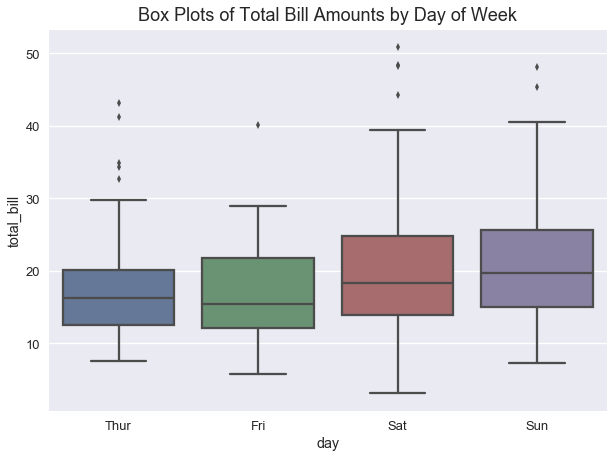

In [76]:
plt.figure(figsize=(10,7))
ax3=sns.boxplot(x='day', y='total_bill', data=df_tips, saturation=0.5)
ax3.axes.set_title('Box Plots of Total Bill Amounts by Day of Week', fontsize=18, y=1.01);

**Interpretation of Outliers for Thursday**    
Their calculation of outliers in box plots is as so: any point in which the value is greater than (Q3-Q1)*1.5 + Q3.

In [77]:
Q1 = df_tips[df_tips['day']=='Thur']['total_bill'].quantile(0.25)
Q3 = df_tips[df_tips['day']=='Thur']['total_bill'].quantile(0.75)

In [78]:
outlier_threshold = (Q3-Q1)*1.5 + Q3 

In [79]:
round(outlier_threshold,2)

31.72

Any total bill value greater than 31.72 U.S. dollars on Thursday is considered an outlier.  
The math below queries our tips dataset for orders on Thursday and greater than 31.72 U.S. dollars.

In [80]:
df_tips[(df_tips['day']=='Thur') & (df_tips['total_bill']>31.71)]['total_bill'].values

array([32.68, 34.83, 34.3 , 41.19, 43.11])

**Interpretation of Box Plots of Total Bill Amounts By Day**   

For total bill amounts on Thursday, the maximum non-outlier value is ~30 U.S. dollars.  

Generally, people spend more money at this restaurant on weekends, Saturdays and Sundays, than weekdays since the median total bill of Saturday and Sunday are greater than the median values of Thursday and Friday.  

On weekends, there's much more variance in people's spending patterns for meals than on weekdays.  

Saturday has the highest recorded outlier at over 50 U.S. dollars.  
***   

### iv. External Links:
&#8195;[1. Khancademy(Box_plot)](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review)  
&#8195;[2. Dan_Friedman](https://dfrieds.com/data-visualizations/when-use-box-plots)